# Leitura de imagens com OpenCV

In [1]:
import cv2

print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 4.5.3 


A biblioteca *OpenCV* é importada no Python com `import cv2`.

A versão ideal para esta disciplina é a *OpenCV 4*, que também se chama `cv2` (não existe `cv4`)

O `print` acima vai dizer a versão que você tem.

<div id="leitura"></div>

## Leitura e exibição de imagens

A função `cv2.imread` na célula abaixo fará a leitura de um arquivo de imagem e armazenará em uma variável, `grid`.

Observe a imagem abaixo, que é a imagem [original](img/img9x9_aumentada.png).

![](img/img9x9_aumentada.png)

Primeiramente vamos **abrir** a imagem:

In [2]:
grid = cv2.imread("img/img9x9_aumentada.png")

Uma das formas de exibir a imagem é com `matplotlib`

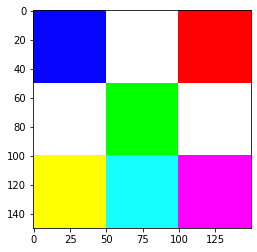

In [3]:
import matplotlib.pyplot as plt
plt.imshow(grid,interpolation="none")
plt.show()

Podemos também usar janelas do OpenCV para mostrar imagens. Só não podemos esquecer de chamar `cv2.waitKey()` para segurar a imagem, e `cv2.destroyAllWindows()` para fechar as janelas antes de sair da célula de código.

**AVISO:** A célula abaixo vai abrir uma janela com a imagem. Esta janela pode estar escondida atrás desta janela do navegador.

**AVISO:** Se você fechar a janela, o programa vai travar. Para continuar a execução, `aperte qualquer tecla enquanto a janela estiver ativa`.

In [4]:
cv2.imshow("Imagem BGR", grid)
cv2.waitKey()
cv2.destroyAllWindows()

O que aconteceu? Porque a saida das duas células acima é diferente?
Historicamente, a ordem dos sub-pixels das imagens usadas pelo OpenCV é invertida: em vez de `RGB` é `BGR`.
Por este motivo, quando usamos o `matplotlib` para exibir imagens, precisamos inverter a ordem dos sub-pixels.

Vamos realizar uma conversão de tipos entre `BGR` e `RGB` usando a função `cv2.cvtColor`:

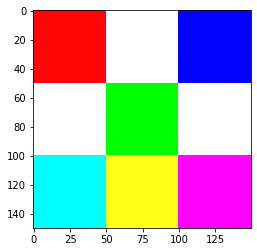

In [5]:
grid_rgb = cv2.cvtColor(grid, cv2.COLOR_BGR2RGB)
plt.imshow(grid_rgb,interpolation="none")
plt.show()

## Imagens como matrizes

No OpenCV as imagens são matrizes do numpy. Vamos carrgar uma versão pequena da imagem anterior, com apenas 9 pixels 

In [6]:
mini_grid = cv2.imread("img/img9x9.png")
mini_grid_rgb = cv2.cvtColor(mini_grid, cv2.COLOR_BGR2RGB)
type(mini_grid_rgb)

mini_grid_rgb.shape

(3, 3, 3)

In [7]:
mini_grid_rgb

array([[[255,   5,   5],
        [255, 255, 255],
        [  1,   1, 255]],

       [[255, 255, 255],
        [  1, 255,   1],
        [255, 255, 255]],

       [[  2, 255, 255],
        [255, 255,  21],
        [255,   1, 255]]], dtype=uint8)

Note que o *tipo* 'uint8'  quer dizer *unsigned int de 8 bits*. Ou seja, é capaz de representar entre $0$ e $2^{8}-1=255$

Esta informação é importante quando manipularmos os bits da imagem. É preciso ter certeza de que não vai ocorrer *overflow* - atribuir valores que o tipo não suporte

## Transposta de uma matriz

Precisamos especificar na transposta a ordem em que esperamos que as dimensões da imagem original apareçam. O padrão da OpenCV para a ordem das dimensões é `0=linhas`,  `1=colunas` e `2=componentes de cor`. O que queremos é uma transposta de linhas e colunas, portanto deve ficar como abaixo:

In [8]:
trans = grid_rgb.transpose((1,0,2))

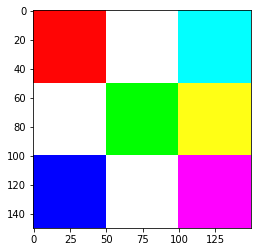

In [9]:
plt.imshow(trans,interpolation="none")
plt.show()

Note que a imagem acima teve linhas e colunas transpostas.

Agora, vamos estudar uma imagem de uma [arara](img/arara.jpg), primeiramente vamos ler a imagem e exibi-la.

In [10]:
arara = cv2.imread("img/arara.jpg")

O atributo `shape` traz as dimensões da matriz.

Antes de executar o comando, observe os eixos da imagem abaixo. 

**Pergunta:** Qual é a dimensão da imagem (linhas, colunas, componentes de cor)?


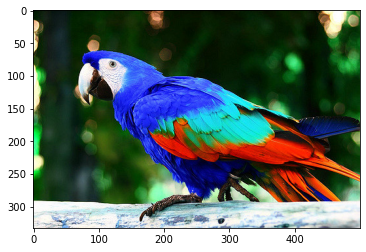

In [11]:
plt.imshow(arara)
plt.show()

In [12]:
arara.shape

(333, 500, 3)

Vamos transpor também a imagem da arara

In [13]:
arara_transposta = arara.transpose((1,0,2))

In [14]:
arara.shape

(333, 500, 3)

In [15]:
arara_transposta.shape

(500, 333, 3)

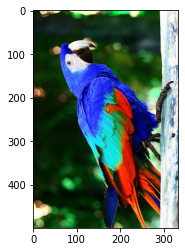

In [16]:
plt.imshow(arara_transposta)
plt.show()

## Conversão entre tipos de cor

Na OpenCV a função cv2.cvtColor faz a conversão entre tipos de cor. No caso vamos converter de BGR para RGB

In [17]:
arara_rgb = cv2.cvtColor(arara, cv2.COLOR_BGR2RGB)

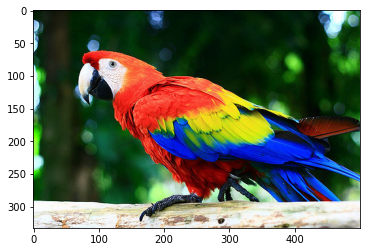

In [18]:
plt.imshow(arara_rgb)
plt.show()

In [19]:
arara_rgb.shape

(333, 500, 3)

## Separando os canais da imagem

O OpenCV permite gerenciar os canais de cor usando `cv2.split()` e `cv2.merge()`

In [20]:
arara_r, arara_g, arara_b = cv2.split(arara_rgb)
print(arara_rgb.shape)

(333, 500, 3)


A terceira dimensão é a das componentes de cor. Nesta dimensão, também podemos separar R,G e B usando os índices

Canal vermelho

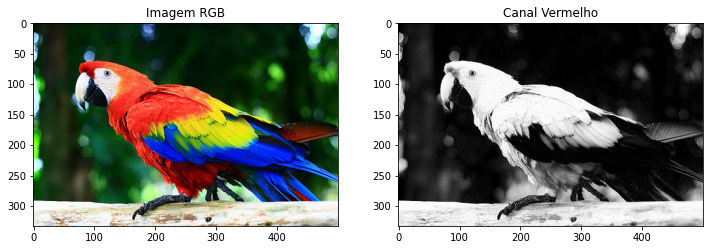

In [21]:
plt.figure(figsize=(12,20))

plt.subplot(121)
plt.title("Imagem RGB")
plt.imshow(arara_rgb)

plt.subplot(122)
plt.title("Canal Vermelho")
plt.imshow(arara_r, cmap='gray')
plt.show()

Canal verde

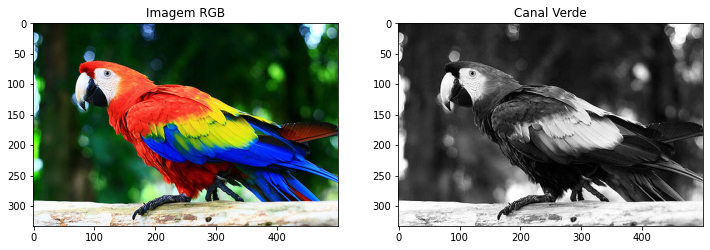

In [22]:
plt.figure(figsize=(12,20))

plt.subplot(121)
plt.title("Imagem RGB")
plt.imshow(arara_rgb)

plt.subplot(122)
plt.title("Canal Verde")
plt.imshow(arara_g, cmap='gray') # Mostrando o resultado de cv2.split()
plt.show()

Canal azul

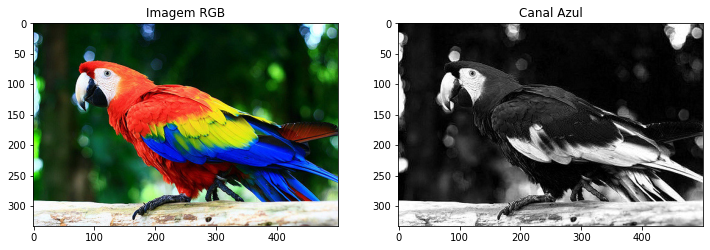

In [23]:
plt.figure(figsize=(12,20))

plt.subplot(121)
plt.title("Imagem RGB")
plt.imshow(arara_rgb)

plt.subplot(122)
plt.title("Canal Azul")
plt.imshow(arara_b, cmap='gray') # Mostrando o resultado de cv2.split()

plt.show()

Podemos também voltar à imagem original combinando os canais

In [24]:
arara_rgb_original = cv2.merge([arara_r, arara_g, arara_b])

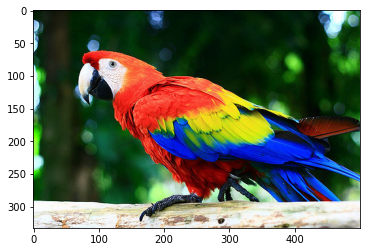

In [25]:
plt.imshow(arara_rgb_original)
plt.show()

## Usando webcam

Devemos usar cv2.VideoCapture para ler de câmeras e arquivos de vídeo

In [26]:
webcam = cv2.VideoCapture(0) # Tente vários IDs para descobrir qual é em sua webcam

In [27]:
import time as t
t.sleep(5) # Espera a webcam ficar pronta

A função que de fato lê é a `read()`

In [28]:
val, image = webcam.read()

In [29]:
val  # Checa se um frame chegou

True

In [30]:
webcam.release() # fecha a webcam

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

In [32]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Vamos ver a imagem

In [ ]:
plt.imshow(image_rgb)
plt.show()

Podemos também usar a janela do OpenCV para mostrar um video

In [34]:
webcam = cv2.VideoCapture(0)
cv2.namedWindow("cam")
while(True):
    val, image = webcam.read()
    if val:
        cv2.imshow("cam", image)
    if cv2.waitKey(1) == 27: # Aguarda 1 ms pela tecla 'ESC'
        break
            
cv2.destroyAllWindows()
webcam.release()

## Prática


**Exercício 1**: Usando a célula abaixo, baixe uma imagem da internet, carregue essa imagem e mostre os seus três canais usando `matplotlib`. 

In [35]:
import cv2
import matplotlib.pyplot as plt

# Seu código aqui


**Exercício 2**: Usando a célula abaixo, mostre o video de sua webcam com as cores "invertidas" (RGB em vez de BGR), e com a imagem transposta. 

In [36]:
import cv2
import matplotlib.pyplot as plt

# Seu código aqui